In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
x_test.shape


(10000, 28, 28)

In [ ]:
cat = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']


In [ ]:
set(y_train)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

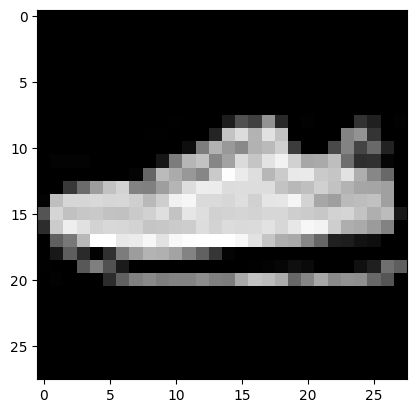

In [ ]:
plt.imshow(x_train[425], cmap = 'gray');

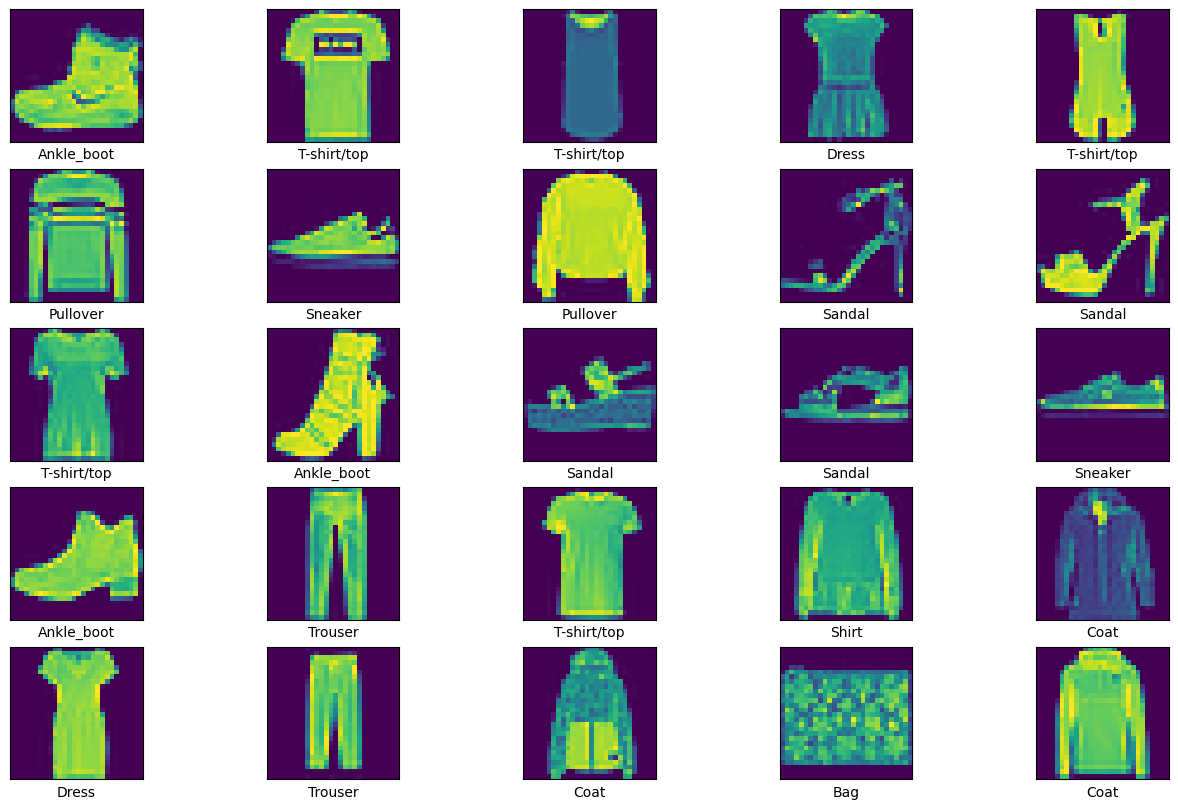

In [ ]:
plt.figure(figsize=(16,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(cat[y_train[i]])


In [ ]:
x_train[1];


In [ ]:
x_train[1].shape


(28, 28)

In [ ]:
# add a colour channel
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)


In [ ]:
x_train[1].shape


(28, 28, 1)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation= 'relu', input_shape=(28, 28, 1)),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation= 'relu'),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation= 'relu'),
    Flatten(),
    Dense(64, activation= 'relu'),
    Dense(10, activation= 'softmax')
]) # Enclose the layers within a list when initializing the Sequential model

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'],
optimizer = 'adam')
history = model.fit(x_train, y_train, epochs = 10, batch_size = 10,
validation_split= 0.2)


Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 72s 14ms/step - accuracy: 0.7665 - loss: 0.8185 - val_accuracy: 0.8648 - val_loss: 0.3676
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 72s 15ms/step - accuracy: 0.8660 - loss: 0.3716 - val_accuracy: 0.8543 - val_loss: 0.3842
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 77s 14ms/step - accuracy: 0.8810 - loss: 0.3250 - val_accuracy: 0.8815 - val_loss: 0.3274
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - accuracy: 0.8876 - loss: 0.3000 - val_accuracy: 0.8759 - val_loss: 0.3592
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.8956 - loss: 0.2814 - val_accuracy: 0.8719 - val_loss: 0.3390
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - accuracy: 0.8992 - loss: 0.2688 - val_accuracy: 0.8857 - val_loss: 0.3370
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.9018 - loss: 0.2662 - val_accuracy: 0.8821 - val_loss: 0.3520
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - accuracy: 0.9057 -

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8778 - loss: 0.4211
